Este colab fue desarrollado por Arnold Charry Armero

# Paynothing Shoes

Cada año, Paynothing Shoes enfrenta demandas (que
debe cumplirse a tiempo) para pares de zapatos como se muestra en la Tabla
37  .Los trabajadores trabajan tres trimestres consecutivos y luego reciben
un cuarto de descuento. Por ejemplo, un trabajador puede trabajar durante
trimestres 3 y 4 de un año y trimestre 1 del año siguiente.
Durante el trimestre en que un trabajador trabaja, éste puede
producir hasta 50 pares de zapatos. Cada trabajador recibe $\$ 500$
por cuarto. Al final de cada trimestre, un costo de tenencia de $\$ 50$
por par de zapatos. Formule un LP que pueda ser utilizado para minimizar el costo por año (mano de obra) de
Satisfacer las demandas de zapatos. Para simplificar las cosas, supongamos que al final de cada año el inventario final es cero.
(Pista: es permisible suponer que un trabajador determinado obtendrá
el mismo trimestre de descuento durante cada año.)

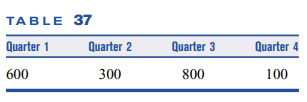

#Conjuntos

$ t = \text{Periodo indexado por } t$

$ w = \text{Trabajadores indexado por } w$


# Parámetros

$CT_{t} = \textrm{Costo de pago a cada trabajador } \textrm{en el tiempo } t$

$ CI_{t} = \textrm{Costo de mantener en inventario una unidad } t $

$ Q_{t} = \textrm{Cantidad producida por cada trabajador en el tiempo } t $

$B_{ij} = \textrm{1 si el trabajador } j \textrm{ trabaja en el tiempo } t, \textrm{ 0 lo contrario }$

$ d_{t} = \textrm{Demanda de zapatos en el tiempo }  t$

# Variables de decisión

$ x_{i} = \textrm{Trabajadores que producen zapatos en el periodo } t $

$ s_{i} = \textrm{Zapatos producidos en el periodo } t $

$ I_{t} = \textrm{Unidades a mantener en inventario en el periodo para los zapatos en } t$


## Función objetivo

$$ \textrm{Min } z = \sum_{t = 1}^{n}x_{t} CT_{t} + \sum_{t = 1}^{n} I_{t}CI_{t}$$

# Restricciones

Se debe satisfacer la demanda en cada periodo $t$

$$ I_{t} = I_{t-1} + s_{t} - d_{t}, \forall t $$

Se deben de producir los zapatos en cada trimestre,

$$ \sum_{t = 1}^{n} B_{tj} Q_{t} x_{t} \geq s_{t}$$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 13.7 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
periodos = range(5)
trabajadores = range(4)

In [9]:
#Parámetros

CT = [1500, 1500, 1500, 1500]

CI = [50, 50, 50, 50]

Q = [50, 50, 50, 50]

D = [600, 300, 800, 100]

B = [[0, 0, 0, 0],
     [0, 1, 1, 1],
     [1, 0, 1, 1],
     [1, 1, 0, 1],
     [1, 1, 1, 0]]

In [13]:
B[1][1]

1

In [17]:
#Se crea la instancia del modelo
model = LpProblem(name = "Paynothing_Shoes", sense = LpMinimize)

#Inicialización de las variables de decisión
X = LpVariable.dicts("X", (periodos), 0, None, LpInteger)
S = LpVariable.dicts("S", (periodos), 0, None, LpInteger)
I = LpVariable.dicts("I", (periodos), 0, None, LpInteger)

#Función objetivo
model += lpSum([X[t] * CT[t-1] for t in range(1, 5)]) + lpSum([I[t] * CI[t-1] for t in range(1, 5)])

#Restricciones

#Debe haber un inventario inicial
model += I[0] == 0
model += X[0] == 0
model += S[0] == 0


#Tiene que satisfacerse el inventario
for t in range(1, 5):
  model += I[t-1] +  S[t] - D[t-1] == I[t]

for j in range(1, 5):
  model += lpSum([B[j][t-1] * Q[t-1] * X[t] for t in range(1, 5)]) >= S[t]

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

#Se imprime la función objetivo
print("Costo total = $", value(model.objective))

Status Optimal
I_0 = 0.0
I_1 = 0.0
I_2 = 0.0
I_3 = 0.0
I_4 = 0.0
S_0 = 0.0
S_1 = 600.0
S_2 = 300.0
S_3 = 800.0
S_4 = 100.0
X_0 = 0.0
X_1 = 1.0
X_2 = 1.0
X_3 = 0.0
X_4 = 1.0
Costo total = $ 4500.0
